# EDA sobre los precios de billetes de avión

## Preparación del notebook

In [744]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import seaborn.objects as so
%matplotlib inline


In [745]:
df=pd.read_csv('data\\Clean_Dataset.csv')

df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Introducción al caso

El objetivo del estudio es analizar el conjunto de datos de reservas de vuelos obtenido del sitio web "Ease My Trip"
y realizar diversas pruebas estadísticas de hipótesis para obtener información significativa del mismo.
Easemytrip" es una plataforma de Internet para reservar billetes de avión.
Un estudio exhaustivo de los datos ayudará a descubrir información valiosa que será de enorme valor para los pasajeros.

## Preguntas de investigación

El objetivo de nuestro estudio es responder a las siguientes preguntas de investigación:

    a) ¿Varía el precio con las aerolíneas?

    b) ¿Cómo se ve afectado el precio cuando los billetes se compran sólo 1 ó 2 días antes de la salida?
    
    c) ¿Cambia el precio del billete en función de la hora de salida y de llegada?

    d) ¿Cómo varía el precio con el cambio de origen y destino?
    
    e) ¿Cómo varía el precio del billete entre la clase Turista y la Business?

## Carga de los datos

In [746]:
'''cargamos fcihero desde la carpeta data'''
df=pd.read_csv('data\\Clean_Dataset.csv')

'''guardamos dataframe original por si lo necesitamos más adelante'''
df_original=df

'''mostrasmos 5 primeros registros'''

df.columns = df.columns.str.strip()

df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Exploración y preparación de los datos

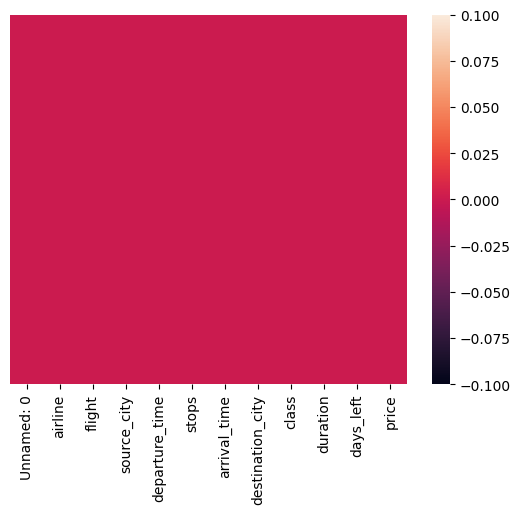

In [747]:
#Inspeccionamos de forma gráfica el nivel de valores nulos que hay en el dataframe

sns.heatmap(df.isna(),yticklabels=False);

#Parece que no hay valores nulos


In [748]:
#Inspeccionamos los tipos de datos de cada varialble y la cantidad de filas, columnas
#Comprobamos que no hay valores nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [749]:
#Obtenemos el número de valores únicos de las columnnas con valores categóricos

for col in df.select_dtypes(include='object').columns:
    
    print(f"{col:25} ---> {df[col].nunique():15} unique values")

airline                   --->               6 unique values
flight                    --->            1561 unique values
source_city               --->               6 unique values
departure_time            --->               6 unique values
stops                     --->               3 unique values
arrival_time              --->               6 unique values
destination_city          --->               6 unique values
class                     --->               2 unique values


In [750]:
#kpis básicos de las columnuas no catagoricas'''
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [751]:
#obtenemos una muestra de registros
sample=df[df['class']=='Economy'].query("flight=='UK-996' and days_left== 10")
sample

# vemos que el campo duración no tiene sentido entendido como duración del vuelo
# por lo tanto lo eliminaremos el campo y los duplicados que generara su eliminación

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
44441,44441,Vistara,UK-996,Mumbai,Evening,zero,Night,Delhi,Economy,2.17,10,6678
54250,54250,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,14.17,10,12468
54251,54251,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,16.33,10,12468
62905,62905,Vistara,UK-996,Mumbai,Evening,one,Morning,Kolkata,Economy,14.08,10,11129
62906,62906,Vistara,UK-996,Mumbai,Evening,one,Morning,Kolkata,Economy,15.08,10,11129
62913,62913,Vistara,UK-996,Mumbai,Evening,one,Evening,Kolkata,Economy,23.58,10,11129
62914,62914,Vistara,UK-996,Mumbai,Evening,one,Evening,Kolkata,Economy,25.08,10,11129
71449,71449,Vistara,UK-996,Mumbai,Evening,one,Afternoon,Hyderabad,Economy,18.08,10,11129
71450,71450,Vistara,UK-996,Mumbai,Evening,one,Evening,Hyderabad,Economy,22.50,10,11129
71451,71451,Vistara,UK-996,Mumbai,Evening,one,Evening,Hyderabad,Economy,25.42,10,11129


A continución:

    1- Eliminaremos del dataframe la columna Unnamed, parece ser el índice anterior

    2- El campo duración esta en formato horas.minutos ejemplo= 2.17 son 2 horas y 17 minutos. Es algo extraño que existan duraciones de vuelo de 49 horas con 83 minutos, eliminaremos el campo y los reg duplicado que genera al eliminarlo.
    
    3- La columna price rejefla el precio en rupias ya que observando las aerolinias, origenes y destinos vemos que todo esta ubicado en la India, para hacerlo más familiar a la audiencia transformaremos este campo a € con un cambio de 1€ --> 88 rupias

    4- Daremos orden a los campos de salida y llegada de los vuelos

    5-Volveremos a comprobar duplicaciones para quedarnos con un precio por combinación de varibles categóricas y 'days_left'

In [752]:
df=df.drop(['Unnamed: 0','duration'],axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955


In [753]:
df.shape

(300153, 10)

In [754]:
df = df.drop_duplicates()
df.shape

(260603, 10)

In [755]:
sample=df[df['class']=='Economy'].query("flight=='UK-996' and days_left== 10")
sample

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
44441,Vistara,UK-996,Mumbai,Evening,zero,Night,Delhi,Economy,10,6678
54250,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,10,12468
62905,Vistara,UK-996,Mumbai,Evening,one,Morning,Kolkata,Economy,10,11129
62913,Vistara,UK-996,Mumbai,Evening,one,Evening,Kolkata,Economy,10,11129
71449,Vistara,UK-996,Mumbai,Evening,one,Afternoon,Hyderabad,Economy,10,11129
71450,Vistara,UK-996,Mumbai,Evening,one,Evening,Hyderabad,Economy,10,11129


In [756]:
df2=df
df2=df2.drop('price',axis=1)
df2 = df.drop_duplicates()
df2.shape
#comprobamos que el campo duración duplicaba los registro con un df.shape(260603, 10)=df2(260603, 10), ya no lo hace

(260603, 10)

In [757]:
sample=df[df['class']=='Economy'].query("flight=='UK-996' and days_left== 10")
sample

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
44441,Vistara,UK-996,Mumbai,Evening,zero,Night,Delhi,Economy,10,6678
54250,Vistara,UK-996,Mumbai,Evening,one,Morning,Bangalore,Economy,10,12468
62905,Vistara,UK-996,Mumbai,Evening,one,Morning,Kolkata,Economy,10,11129
62913,Vistara,UK-996,Mumbai,Evening,one,Evening,Kolkata,Economy,10,11129
71449,Vistara,UK-996,Mumbai,Evening,one,Afternoon,Hyderabad,Economy,10,11129
71450,Vistara,UK-996,Mumbai,Evening,one,Evening,Hyderabad,Economy,10,11129


In [758]:
# Creamos el campo price_euros
df['price_euros']=df['price']/88

In [759]:
# damos orden a los horarios de salidas y llegadas

turnos=[ 'Early_Morning', 'Morning','Afternoon', 'Evening', 'Night',
       'Late_Night']

rt=list(enumerate(turnos))
orden_turnos=[]
for i in range(len(rt)):
       orden_turnos.append(str(rt[i][0]+1)+'-'+str(rt[i][1]))
orden_turnos

dict_turnos = dict(zip(turnos, orden_turnos))
df['departure_time']=df['departure_time'].replace(dict_turnos)

df['arrival_time']=df['arrival_time'].replace(dict_turnos)

df.head()




,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,price_euros
0,SpiceJet,SG-8709,Delhi,4-Evening,zero,5-Night,Mumbai,Economy,1,5953,67.647727
1,SpiceJet,SG-8157,Delhi,1-Early_Morning,zero,2-Morning,Mumbai,Economy,1,5953,67.647727
2,AirAsia,I5-764,Delhi,1-Early_Morning,zero,1-Early_Morning,Mumbai,Economy,1,5956,67.681818
3,Vistara,UK-995,Delhi,2-Morning,zero,3-Afternoon,Mumbai,Economy,1,5955,67.670455
4,Vistara,UK-963,Delhi,2-Morning,zero,2-Morning,Mumbai,Economy,1,5955,67.670455


In [760]:

df.groupby(['departure_time']).flight.count()

departure_time
1-Early_Morning    57795
2-Morning          60401
3-Afternoon        41898
4-Evening          58564
5-Night            40687
6-Late_Night        1258
Name: flight, dtype: int64

In [761]:
# definomos PK como ('airline', 'flight', 'source_city', 'departure_time', 'stops','arrival_time', 'destination_city', 'class', 'days_left'])

#buscamos duplicados o datos extraños

temp=df.groupby(['airline', 'flight', 'source_city', 'departure_time', 'stops','arrival_time', 'destination_city', 'class', 'days_left'],as_index=False)['price_euros'].count()

temp[temp['price_euros']>1]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price_euros
296,AirAsia,I5-1229,Chennai,4-Evening,one,6-Late_Night,Delhi,Economy,3,2
298,AirAsia,I5-1229,Chennai,4-Evening,one,6-Late_Night,Delhi,Economy,5,2
299,AirAsia,I5-1229,Chennai,4-Evening,one,6-Late_Night,Delhi,Economy,6,2
300,AirAsia,I5-1229,Chennai,4-Evening,one,6-Late_Night,Delhi,Economy,7,2
307,AirAsia,I5-1229,Chennai,4-Evening,one,6-Late_Night,Delhi,Economy,15,2
...,...,...,...,...,...,...,...,...,...,...
235773,Vistara,UK-996,Mumbai,4-Evening,one,4-Evening,Kolkata,Economy,29,2
235781,Vistara,UK-996,Mumbai,4-Evening,one,4-Evening,Kolkata,Economy,37,2
235788,Vistara,UK-996,Mumbai,4-Evening,one,4-Evening,Kolkata,Economy,44,2
235793,Vistara,UK-996,Mumbai,4-Evening,one,4-Evening,Kolkata,Economy,49,2


In [762]:
sample=df[(df['flight']=='I5-1229')&(df['source_city']=='Chennai') &(df['days_left']==15)&(df['destination_city']=='Delhi')]
sample
#observamos que hay duplicados y optamos por quedarnos con el mínimo


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price,price_euros
182085,AirAsia,I5-1229,Chennai,4-Evening,one,6-Late_Night,Delhi,Economy,15,7329,83.284091
182113,AirAsia,I5-1229,Chennai,4-Evening,one,5-Night,Delhi,Economy,15,7353,83.556818
182114,AirAsia,I5-1229,Chennai,4-Evening,one,6-Late_Night,Delhi,Economy,15,7353,83.556818


In [763]:

df=df.groupby(['airline', 'flight', 'source_city', 'departure_time', 'stops','arrival_time', 'destination_city', 'class', 'days_left'],as_index=False)['price_euros'].min()
df.shape



(235994, 10)

## Análisis y respuesta a cuestiones

#### ¿Varía el precio con las aerolíneas?

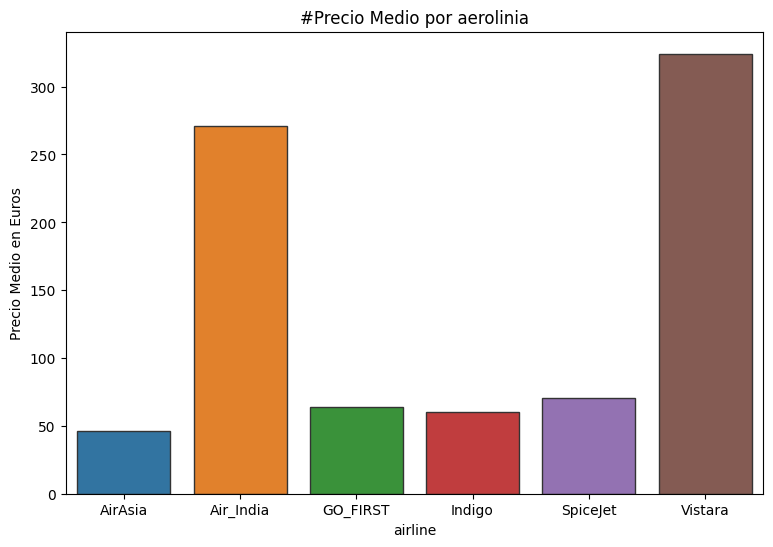

In [764]:
temp=df.groupby('airline',as_index=False).price_euros.mean()


plt.figure(figsize=(9,6))
sns.barplot(x = 'airline',y='price_euros',data = temp,edgecolor=".2")
plt.ylabel("Precio Medio en Euros")
plt.title("#Precio Medio por aerolinia");

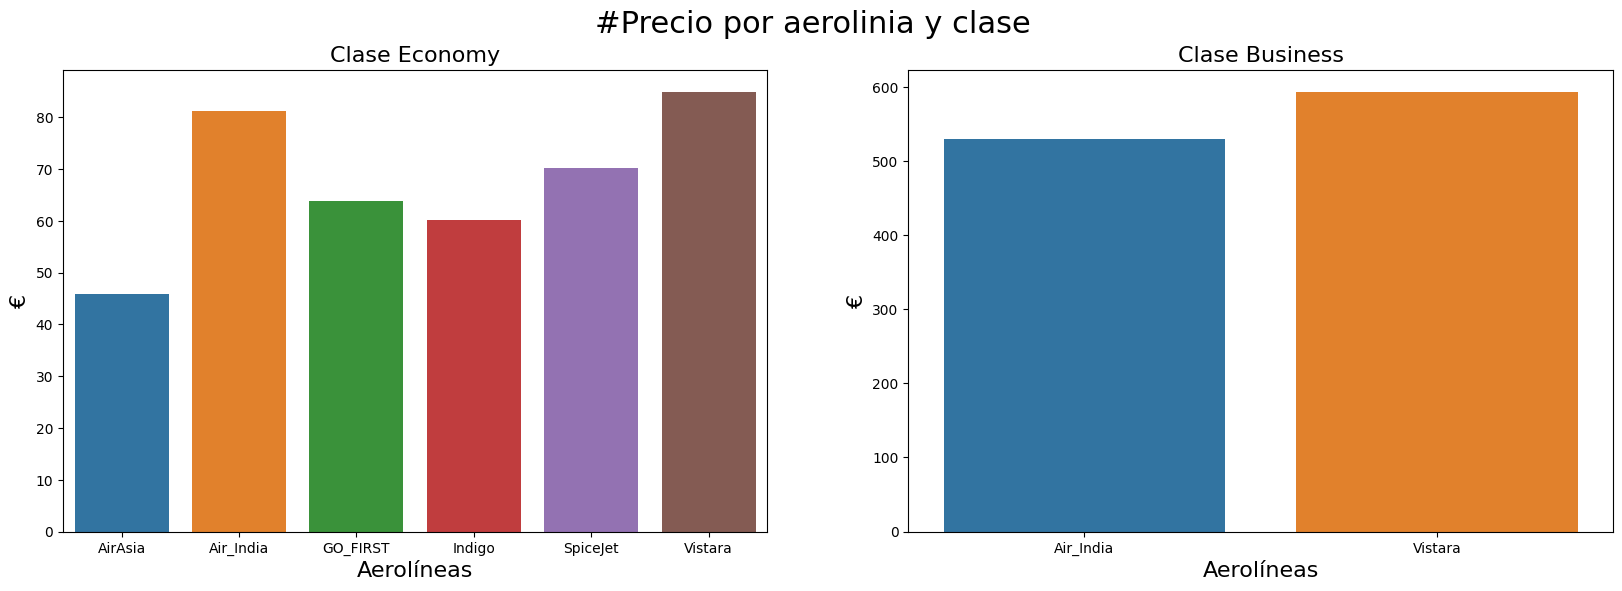

In [765]:
temp=df.groupby(['airline', 'class'],as_index=False).price_euros.mean()


fig,ax=plt.subplots(1,2,figsize=(20,6))
g1=sns.barplot(x='airline',y='price_euros',data=temp[temp['class']=='Economy'],ax=ax[0])
g2=sns.barplot(x='airline',y='price_euros',data=temp[temp['class']=='Business'],ax=ax[1])
fig.suptitle("#Precio por aerolinia y clase",fontsize=22)
ax[0].set_title("Clase Economy",fontsize=16)
ax[1].set_title("Clase Business",fontsize=16)
ax[0].set_ylabel('€',fontsize=16)
ax[1].set_ylabel('€',fontsize=16)
ax[0].set_xlabel('Aerolíneas',fontsize=16)
ax[1].set_xlabel('Aerolíneas',fontsize=16);

La aerolinia Vistara es la aerolínea con precios más altos tanto en Businnes como en Economy, siendo en esta clase sensiblemente más caro que AirAsia que tiene el precio medio más bajo de todos. 

#### ¿Cómo se ve afectado el precio cuando los billetes se compran sólo 1 ó 2 días antes de la salida?

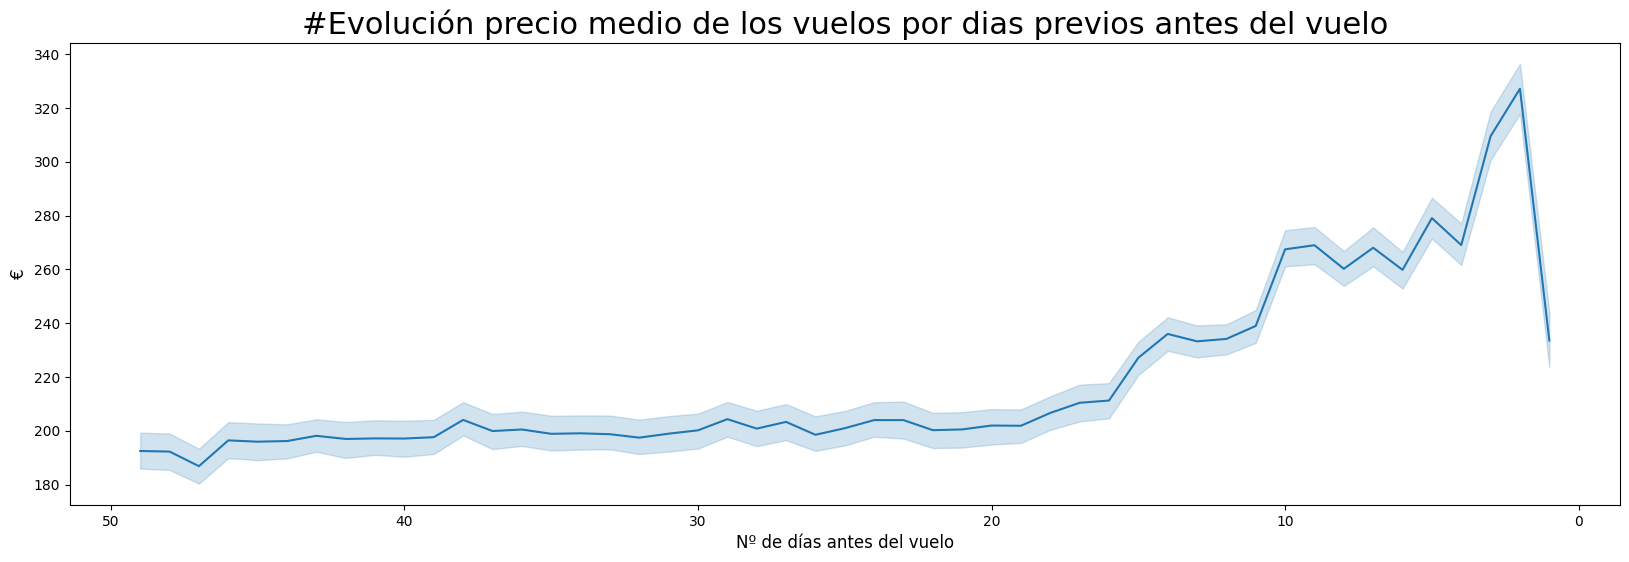

In [766]:
temp=df.loc[:,('days_left','price_euros')].sort_values('days_left',ascending=False)
fig,ax=plt.subplots(figsize=(20,6))
g=sns.lineplot(x='days_left',y='price_euros',data=temp)
plt.ylabel("€",fontsize=12)
plt.xlabel("Nº de días antes del vuelo",fontsize=12)
plt.title("#Evolución precio medio de los vuelos por dias previos antes del vuelo",fontsize=22)
g.invert_xaxis();



Cuidado, esta gráfica es engañosa

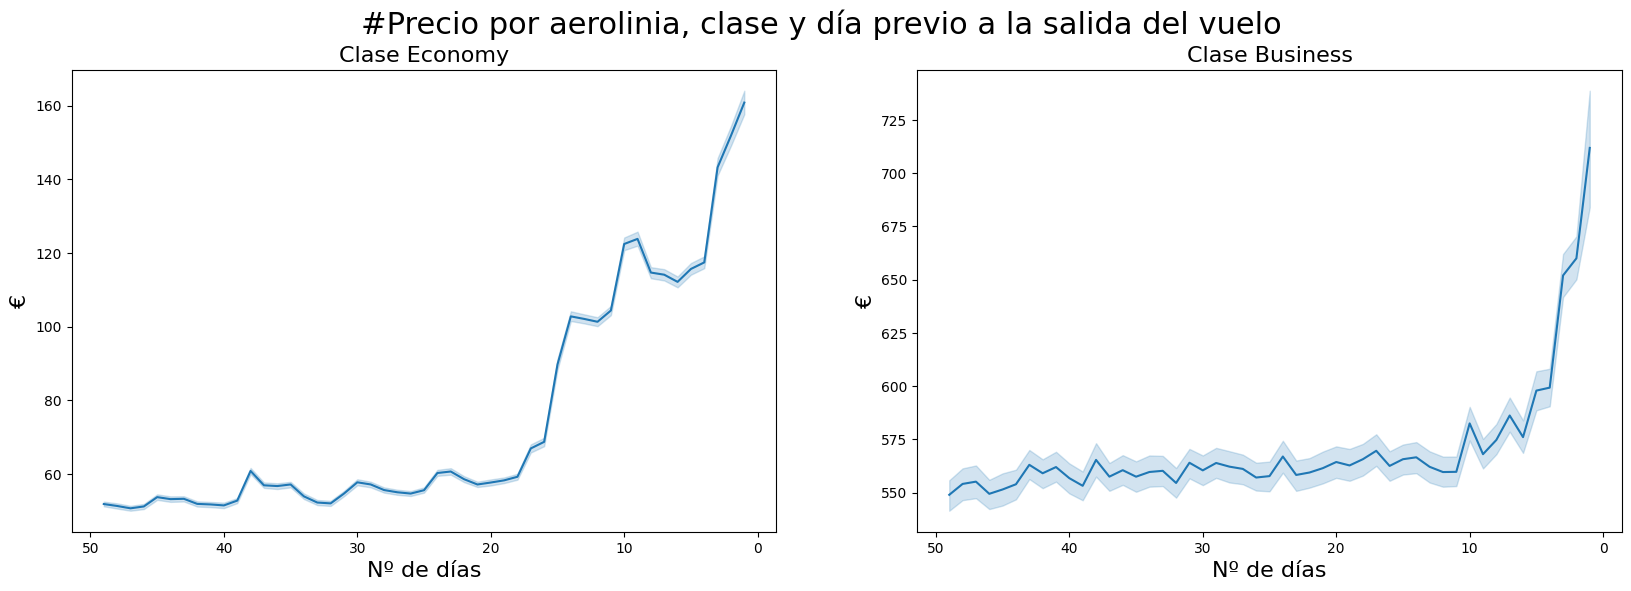

In [767]:
temp=df.loc[:,('days_left','price_euros','class')]


fig,ax=plt.subplots(1,2,figsize=(20,6))
g1=sns.lineplot(x='days_left',y='price_euros',data=temp[temp['class']=='Economy'],ax=ax[0])
g2=sns.lineplot(x='days_left',y='price_euros',data=temp[temp['class']=='Business'],ax=ax[1])
fig.suptitle("#Precio por aerolinia, clase y día previo a la salida del vuelo",fontsize=22)
ax[0].set_title("Clase Economy",fontsize=16)
ax[1].set_title("Clase Business",fontsize=16)
ax[0].set_ylabel('€',fontsize=16)
ax[1].set_ylabel('€',fontsize=16)
ax[0].set_xlabel('Nº de días',fontsize=16)
ax[1].set_xlabel('Nº de días',fontsize=16)
g1.invert_xaxis()
g2.invert_xaxis();

En esta otra vemos que el precio no baja los últimos dias antes del vuelo

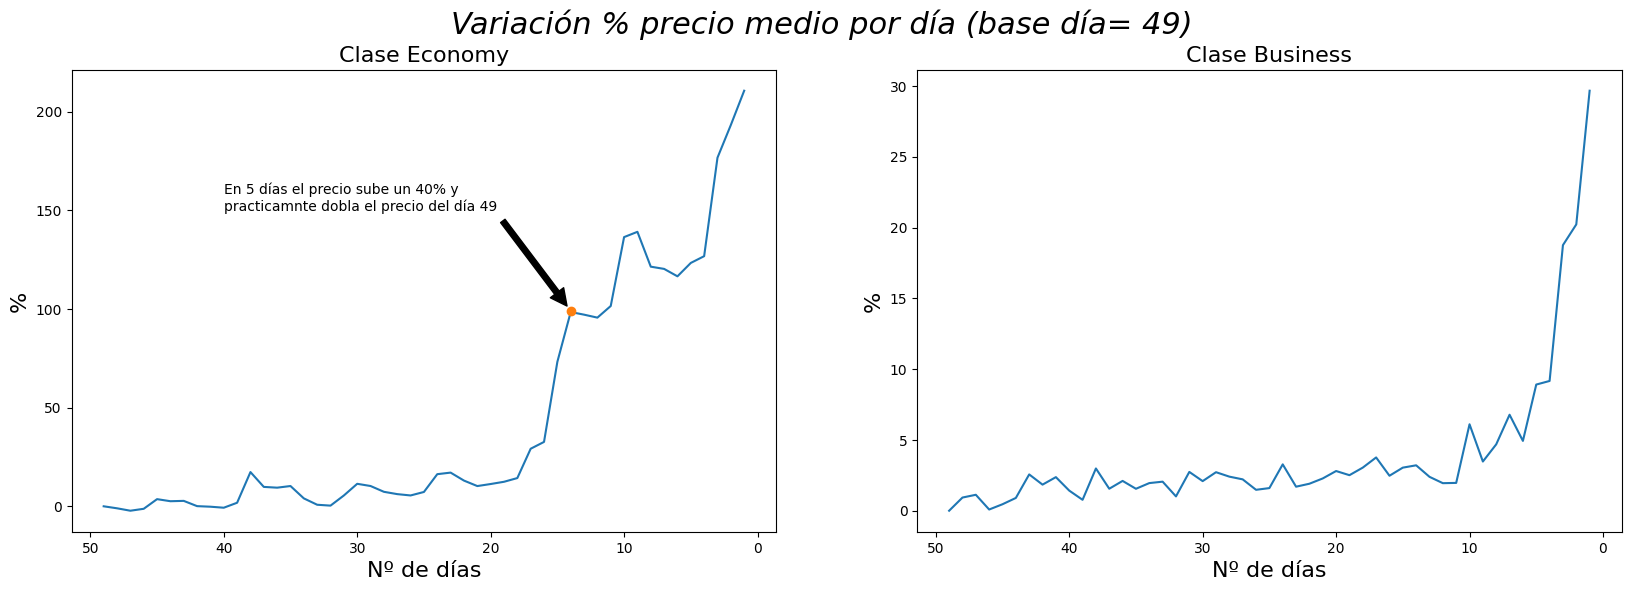

In [768]:
temp1=df[df['class']=='Economy'].groupby(['days_left','class'],as_index=False).price_euros.mean().sort_values('days_left',ascending=False)
temp1['dif_price_euros'] = temp1['price_euros'].diff()
temp1['dif_price_euros_acc']=temp1.dif_price_euros.cumsum()
pdays_max=temp1[temp1['days_left']==temp1['days_left'].max()].price_euros.to_list()
temp1['dif_price_euros_acc%']=((temp1.price_euros/pdays_max[0])-1)*100

temp2=df[df['class']=='Business'].groupby(['days_left','class'],as_index=False).price_euros.mean().sort_values('days_left',ascending=False)
temp2['dif_price_euros'] = temp2['price_euros'].diff()
temp2['dif_price_euros_acc']=temp2.dif_price_euros.cumsum()
pdays_max=temp2[temp2['days_left']==temp2['days_left'].max()].price_euros.to_list()
temp2['dif_price_euros_acc%']=((temp2.price_euros/pdays_max[0])-1)*100

fig,ax=plt.subplots(1,2,figsize=(20,6))
g1=sns.lineplot(x='days_left',y='dif_price_euros_acc%',data=temp1,ax=ax[0])
g2=sns.lineplot(x='days_left',y='dif_price_euros_acc%',data=temp2,ax=ax[1])
fig.suptitle("Variación % precio medio por día (base día= 49)",fontsize=22,style='italic')
ax[0].set_title("Clase Economy",fontsize=16)
ax[1].set_title("Clase Business",fontsize=16)
ax[0].set_ylabel('%',fontsize=16)
ax[1].set_ylabel('%',fontsize=16)
ax[0].set_xlabel('Nº de días',fontsize=16)
ax[1].set_xlabel('Nº de días',fontsize=16)
ax[0].plot([14],[99],'o')
ax[0].annotate(f'En 5 días el precio sube un 40% y\npracticamnte dobla el precio del día 49',
        xy=(14,99), xytext=(40,150),arrowprops=dict(facecolor='black',shrink=0.05))
g1.invert_xaxis()
g2.invert_xaxis();

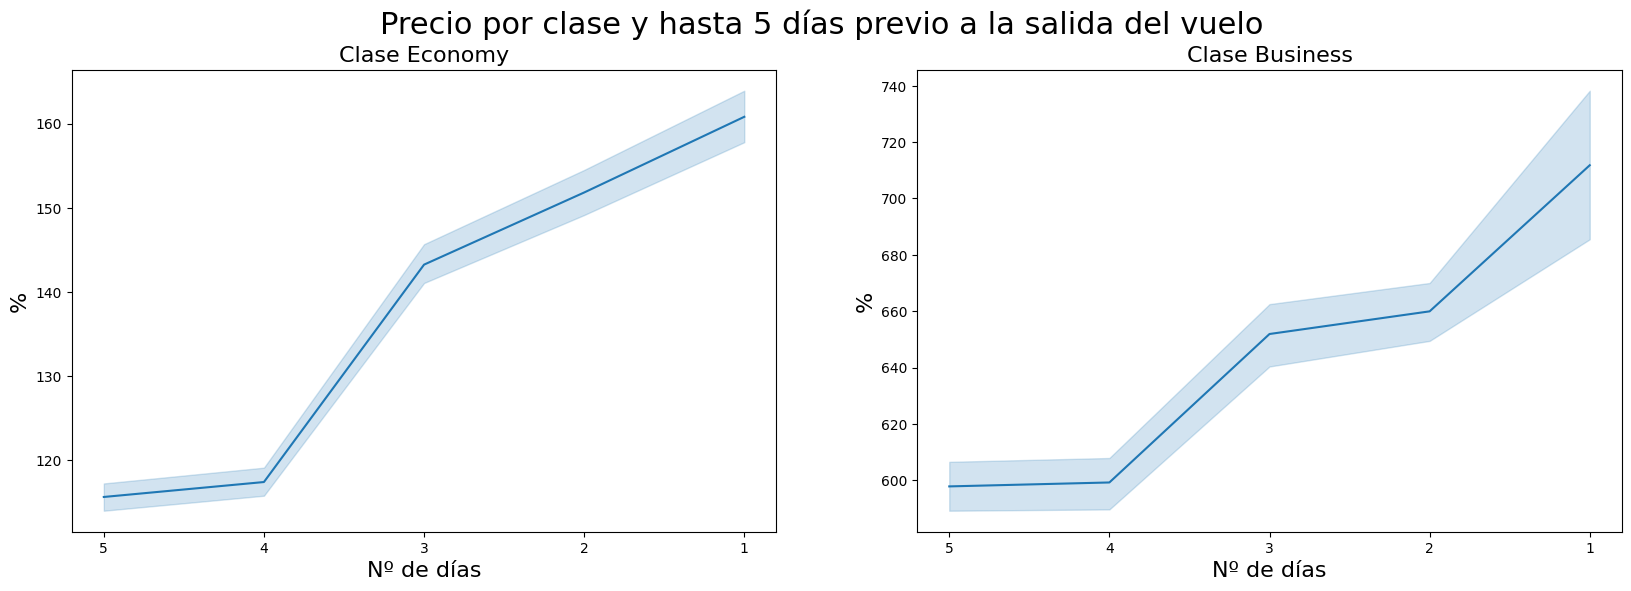

In [769]:
temp=df[df['days_left']<6].loc[:,('days_left','class','price_euros')]


fig,ax=plt.subplots(1,2,figsize=(20,6))
g1=sns.lineplot(x='days_left',y='price_euros',data=temp[temp['class']=='Economy'],ax=ax[0])
g2=sns.lineplot(x='days_left',y='price_euros',data=temp[temp['class']=='Business'],ax=ax[1])
fig.suptitle("Precio por clase y hasta 5 días previo a la salida del vuelo",fontsize=22)
ax[0].set_title("Clase Economy",fontsize=16)
ax[1].set_title("Clase Business",fontsize=16)
ax[0].set_ylabel('%',fontsize=16)
ax[1].set_ylabel('%',fontsize=16)
ax[0].set_xlabel('Nº de días',fontsize=16)
ax[1].set_xlabel('Nº de días',fontsize=16)
ax[0].set(xticks=([1,2,3,4,5]))
ax[1].set(xticks=([1,2,3,4,5]))
g1.invert_xaxis()
g2.invert_xaxis();

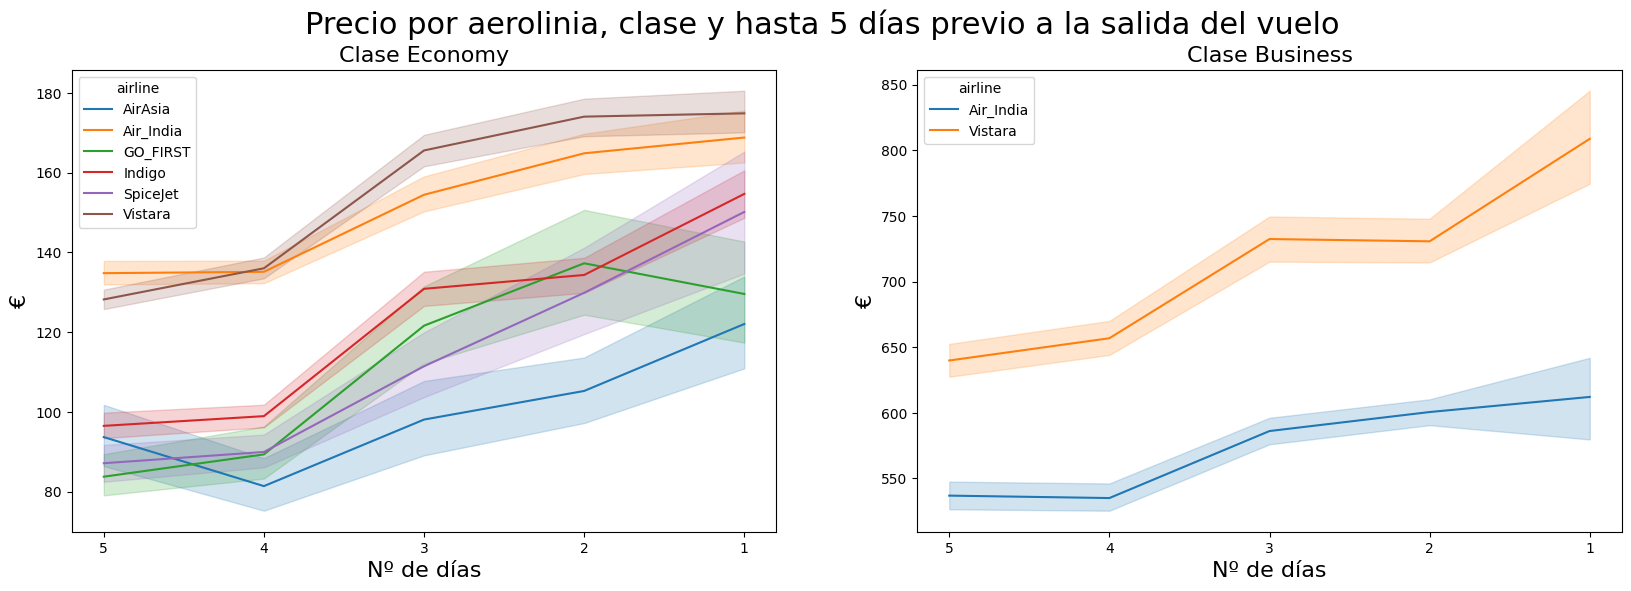

In [770]:
temp=df[df['days_left']<6].loc[:,('days_left','airline','class','price_euros')]


fig,ax=plt.subplots(1,2,figsize=(20,6))
g1=sns.lineplot(x='days_left',y='price_euros',data=temp[temp['class']=='Economy'],hue='airline',ax=ax[0])
g2=sns.lineplot(x='days_left',y='price_euros',data=temp[temp['class']=='Business'],hue='airline',ax=ax[1])
fig.suptitle("Precio por aerolinia, clase y hasta 5 días previo a la salida del vuelo",fontsize=22)
ax[0].set_title("Clase Economy",fontsize=16)
ax[1].set_title("Clase Business",fontsize=16)
ax[0].set_ylabel('€',fontsize=16)
ax[1].set_ylabel('€',fontsize=16)
ax[0].set_xlabel('Nº de días',fontsize=16)
ax[1].set_xlabel('Nº de días',fontsize=16)
ax[0].set(xticks=([1,2,3,4,5]))
ax[1].set(xticks=([1,2,3,4,5]))
g1.invert_xaxis()
g2.invert_xaxis();

Como norma general los precio siguen aumentando hasta el último día de venta excepto la aerolinea GO_FIRT que baja lo precios en casi todos sus vuelos, especialmente destino Bangalore.

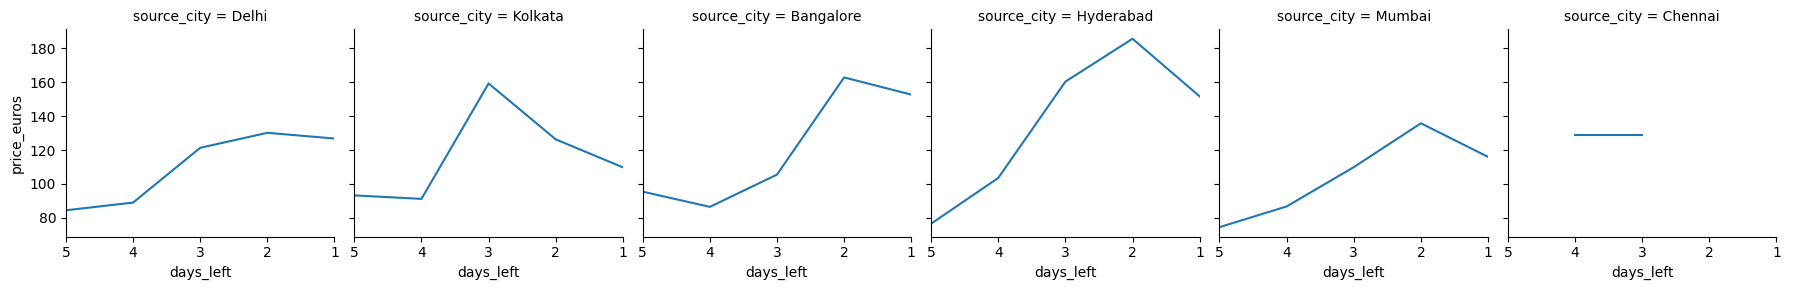

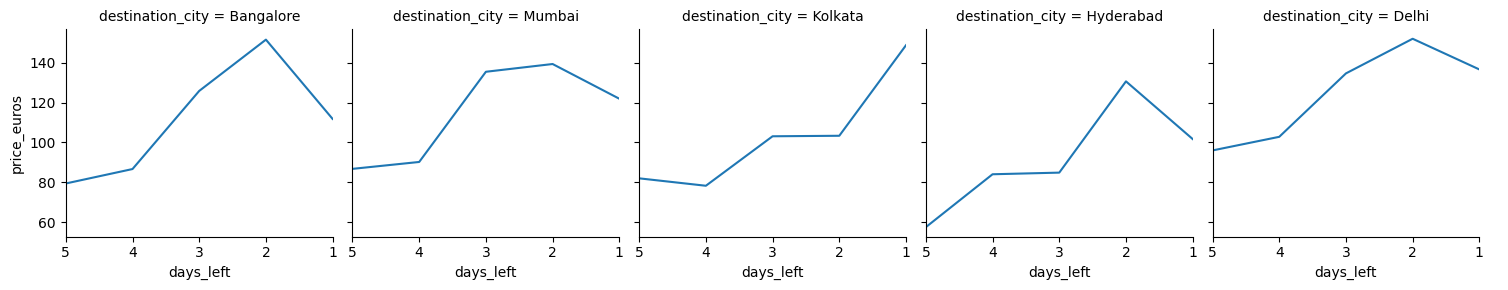

In [771]:
temp=df[(df['days_left']<6) & (df['class']=='Economy')&(df['airline']=='GO_FIRST')]


g1 = sns.FacetGrid(data=temp, col='source_city')
g1 = g1.map(sns.lineplot, 'days_left', 'price_euros', errorbar=None).add_legend()
g2 = sns.FacetGrid(data=temp, col='destination_city')
g2 = g2.map(sns.lineplot, 'days_left', 'price_euros', errorbar=None).add_legend()
g1.set(xlim=(5,1))
g2.set(xlim=(5,1));

#### ¿Cambia el precio del billete en función de la hora de salida y de llegada?

''

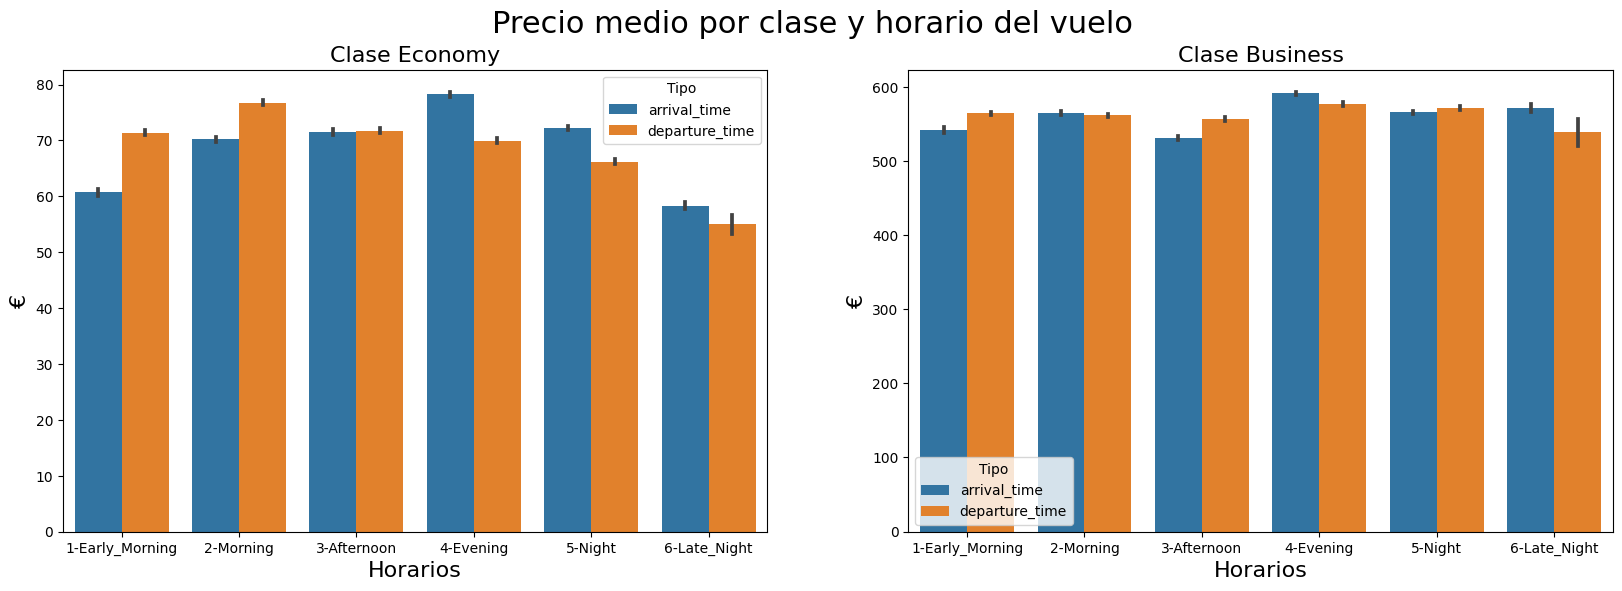

In [772]:
temp=df.loc[:,('class','arrival_time','departure_time','price_euros')].sort_values(['arrival_time','departure_time'])
temp_melt=pd.melt(temp,id_vars=['class','price_euros'], value_vars=['arrival_time','departure_time'],var_name='Tipo', value_name='slot_time')


fig,ax=plt.subplots (1,2,figsize=(20,6))
g1=sns.barplot(x='slot_time',y='price_euros',data=temp_melt[temp_melt['class']=='Economy'],hue='Tipo',ax=ax[0])
g2=sns.barplot(x='slot_time',y='price_euros',data=temp_melt[temp_melt['class']=='Business'],hue='Tipo',ax=ax[1])
fig.suptitle("Precio medio por clase y horario del vuelo",fontsize=22)
ax[0].set_title("Clase Economy",fontsize=16)
ax[1].set_title("Clase Business",fontsize=16)
ax[0].set_ylabel('€',fontsize=16)
ax[1].set_ylabel('€',fontsize=16)
ax[0].set_xlabel('Horarios',fontsize=16)
ax[1].set_xlabel('Horarios',fontsize=16)
;


En clase económica tanto para salidas como llegadas el precio más bajo se encuentra en Late Night
Los precios más elevados se encuentra por la mañana para salidas y por las tardes
En clase business se observan dos bloques tanto para salidas como llegadas donde los tres primeros horarios presentan precios ligeramente más bajos que los últimos tres horarios del día.

#### ¿Cómo varía el precio con el cambio de origen y destino?

In [773]:
#transformamos el dataframe para obtener un dataframe que proprocione por ciudad la clase, el precio de salida y el precio de entrada

temp=df[df['class']=='Business'].groupby(['source_city','destination_city','class'],as_index=False).price_euros.mean()
temp=temp.pivot(index=(['source_city','class']),columns='destination_city', values='price_euros')
temp_t=temp.transpose().mean().to_frame()
temp=temp.mean().to_frame()
temp_t=temp_t.reset_index()
temp_t.rename(columns={0:'price_source','source_city':'city'},inplace=True)
temp=temp.reset_index()
temp.rename(columns={0:'price_destination'},inplace=True)
temp_bisn=pd.merge(temp_t,temp, left_on='city',right_on='destination_city')
temp_bisn.drop(['destination_city'], axis=1,inplace=True)
temp_bisn_melt=pd.melt(temp_bisn, id_vars=['city','class'],value_vars=['price_source','price_destination'], var_name='Precio',value_name='valor')
temp=df[df['class']=='Economy'].groupby(['source_city','destination_city','class'],as_index=False).price_euros.mean()
temp=temp.pivot(index=(['source_city','class']),columns='destination_city', values='price_euros')
temp_t=temp.transpose().mean().to_frame()
temp=temp.mean().to_frame()
temp_t=temp_t.reset_index()
temp_t.rename(columns={0:'price_source','source_city':'city'},inplace=True)
temp=temp.reset_index()
temp.rename(columns={0:'price_destination'},inplace=True)
temp_eco=pd.merge(temp_t,temp, left_on='city',right_on='destination_city')
temp_eco.drop(['destination_city'], axis=1,inplace=True)
temp_eco_melt=pd.melt(temp_eco, id_vars=['city','class'],value_vars=['price_source','price_destination'], var_name='Precio',value_name='valor')
temp_melt=pd.concat([temp_bisn_melt,temp_eco_melt], ignore_index=True)




In [774]:
df.groupby(['class'])['price_euros'].mean()

class
Business    566.847188
Economy      71.449780
Name: price_euros, dtype: float64

''

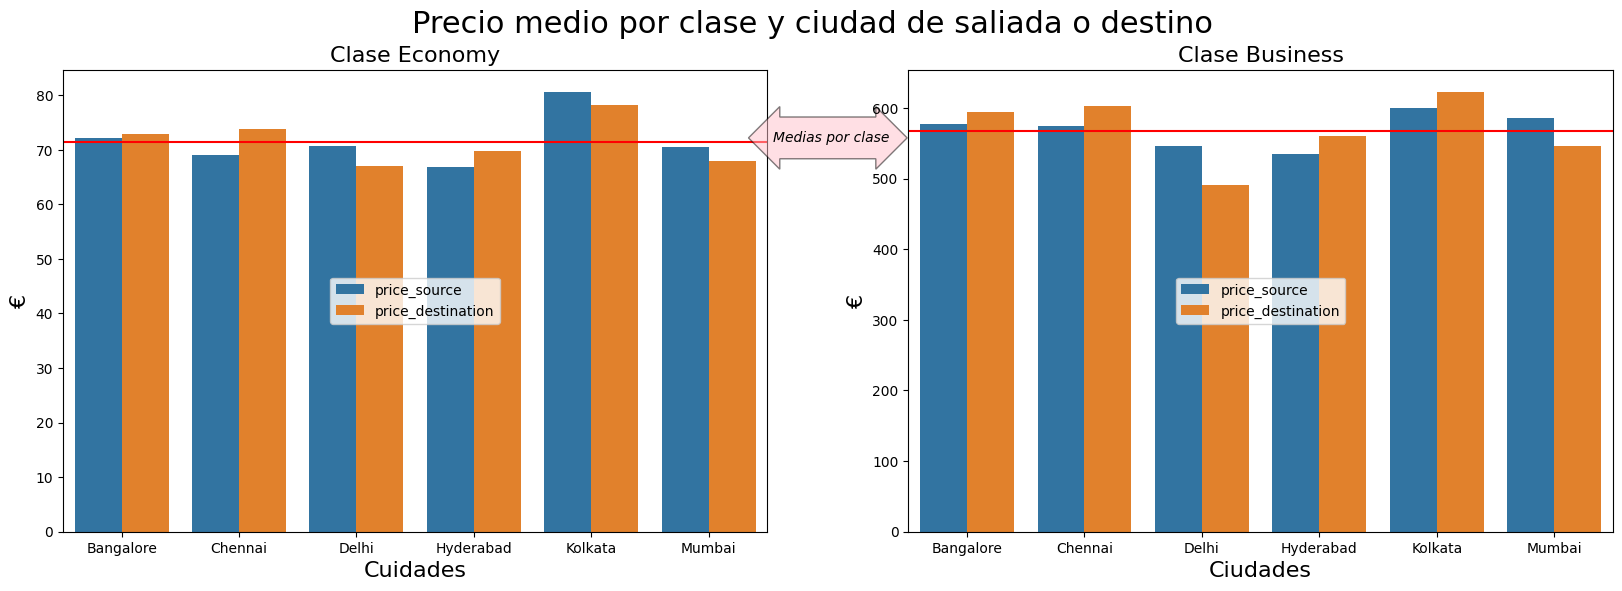

In [775]:
temp_melt

fig,ax=plt.subplots (1,2,figsize=(20,6))
g1=sns.barplot(x='city',y='valor',data=temp_melt[temp_melt['class']=='Economy'],hue='Precio',ax=ax[0]).legend(loc ='center')
g2=sns.barplot(x='city',y='valor',data=temp_melt[temp_melt['class']=='Business'],hue='Precio',ax=ax[1]).legend(loc ='center')
fig.suptitle("Precio medio por clase y ciudad de saliada o destino",fontsize=22)
ax[0].set_title("Clase Economy",fontsize=16)
ax[1].set_title("Clase Business",fontsize=16)
ax[0].set_ylabel('€',fontsize=16)
ax[1].set_ylabel('€',fontsize=16)
ax[0].set_xlabel('Cuidades',fontsize=16)
ax[1].set_xlabel('Ciudades',fontsize=16)
ax[0].axhline(71.449780,color='red') # media de clase economy
ax[1].axhline(566.847188,color='red') # media de clase business
ax[0].text(5.55,71.449780, 'Medias por clase', style='italic',
        bbox={'facecolor':'pink','boxstyle':'darrow','alpha':0.5, 'pad':1}  )
;

In [776]:
temp_melt.groupby(['city','class','Precio'])['valor'].mean()

city       class     Precio           
Bangalore  Business  price_destination    594.168494
                     price_source         576.618681
           Economy   price_destination     72.912373
                     price_source          72.122480
Chennai    Business  price_destination    602.673920
                     price_source         574.372784
           Economy   price_destination     73.888218
                     price_source          69.069475
Delhi      Business  price_destination    491.427148
                     price_source         546.583644
           Economy   price_destination     67.116820
                     price_source          70.605163
Hyderabad  Business  price_destination    560.116965
                     price_source         534.392718
           Economy   price_destination     69.749675
                     price_source          66.912687
Kolkata    Business  price_destination    622.886533
                     price_source         600.542223
       

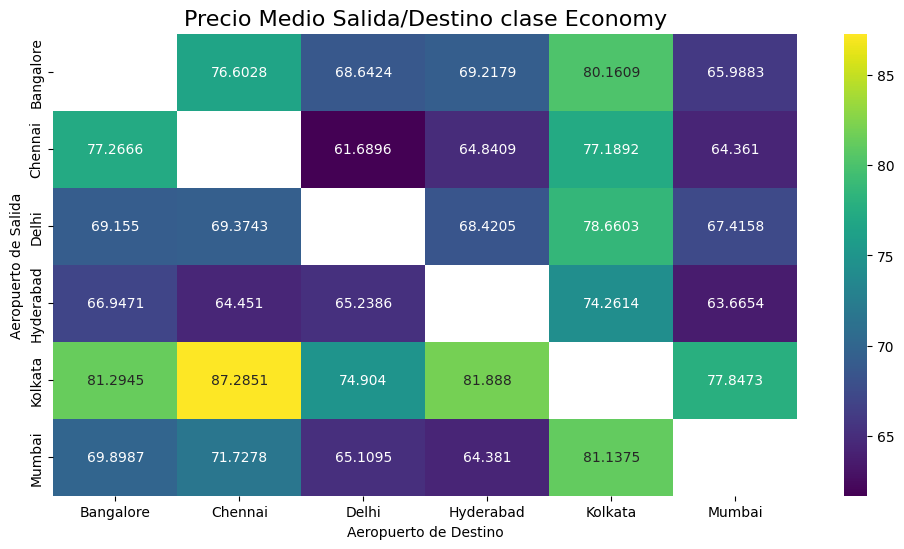

In [777]:
temp=df[df['class']=='Economy'].groupby(['source_city','destination_city'],as_index=False).price_euros.mean()
temp=temp.pivot(index='source_city',columns='destination_city', values='price_euros')

fig,ax=plt.subplots(1,1,figsize=(12,6))

g=sns.heatmap(temp, annot=True, fmt="g", cmap='viridis')
ax.set(xlabel='Aeropuerto de Destino', ylabel='Aeropuerto de Salida')
g.set_title('Precio Medio Salida/Destino clase Economy',size=16)

plt.show();

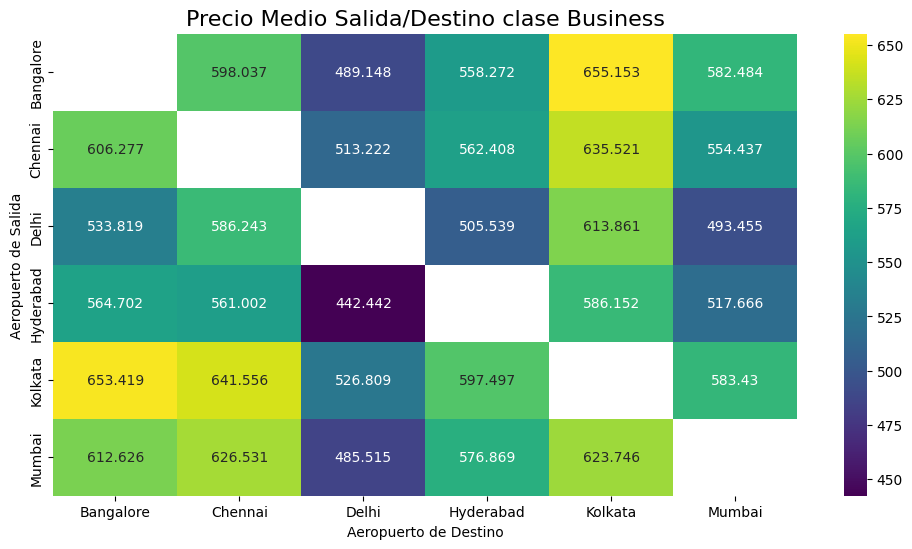

In [778]:
temp=df[df['class']=='Business'].groupby(['source_city','destination_city'],as_index=False).price_euros.mean()
temp=temp.pivot(index='source_city',columns='destination_city', values='price_euros')

fig,ax=plt.subplots(1,1,figsize=(12,6))

g=sns.heatmap(temp, annot=True, fmt="g", cmap='viridis')
ax.set(xlabel='Aeropuerto de Destino', ylabel='Aeropuerto de Salida')
g.set_title('Precio Medio Salida/Destino clase Business',size=16)

plt.show();

Por ciudad las variacione de precio si es llegada o salida son pequeñas.
En cambio si existen mayores diferencias entre ciudades, siendo Delhi la más barata y Kolkata la más cara

#### ¿Cómo varía el precio del billete entre la clase Turista y la Business?

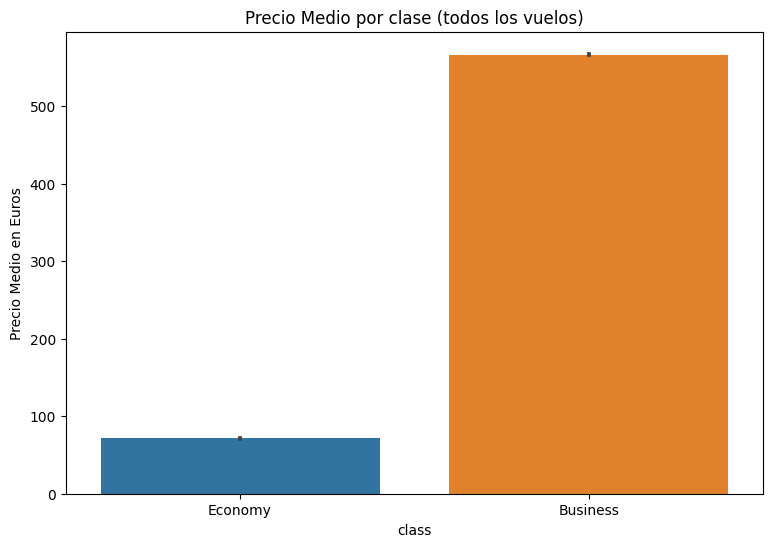

In [784]:
'''Obtenemos el precio por clase'''
plt.figure(figsize=(9,6));
sns.barplot(x='class',y='price_euros',data=df)
plt.ylabel("Precio Medio en Euros")
plt.title("Precio Medio por clase (todos los vuelos)");

In [780]:
df.groupby(['class'])['price_euros'].mean()

class
Business    566.847188
Economy      71.449780
Name: price_euros, dtype: float64

El gráfico muestra que la clase businnes es casi 8 veces más cara que la economy 

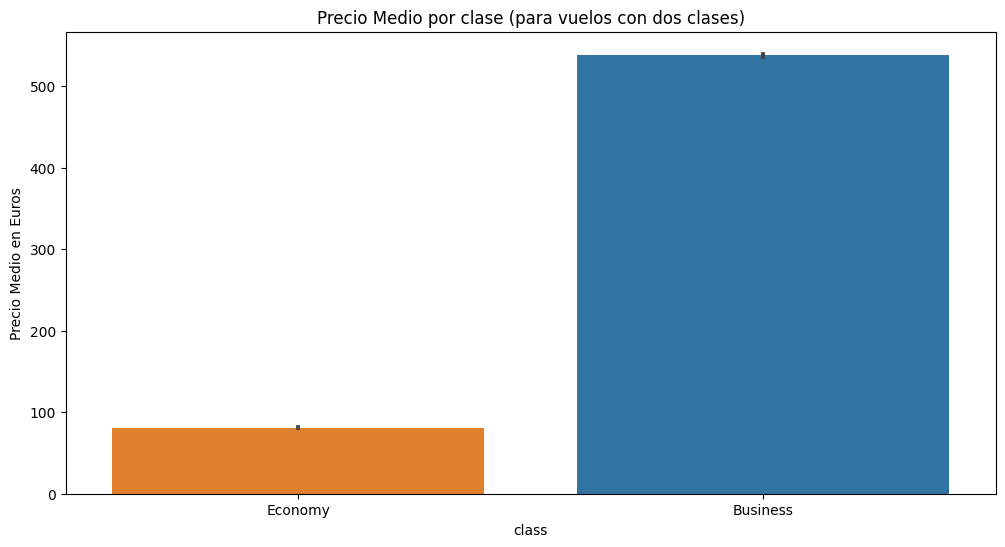

In [781]:
# Obtenemos el precio por clase para las aerolíneas que ofrecen Business y solo en los vuelos con dos clases'''
df_airb=df[(df['airline']=='Vistara')|(df['airline']=='Air_India')]

temp=df_airb.groupby(['airline', 'flight', 'source_city', 'departure_time', 'stops','arrival_time', 'destination_city', 'days_left'],as_index=False)['class'].count()
temp=temp[temp['class']>1]
clave=temp.index.to_list()
temp=df_airb.filter(items=clave,axis=0)


fig,ax=plt.subplots(1,1,figsize=(12,6))
sns.barplot(x='class',y='price_euros',data=temp,ax=ax)
plt.ylabel("Precio Medio en Euros")
plt.title("Precio Medio por clase (para vuelos con dos clases)")
ax.invert_xaxis();

In [782]:
df_airb.groupby(['class'])['price_euros'].mean()

class
Business    566.847188
Economy      83.170720
Name: price_euros, dtype: float64

El gráfico muestra que la clase businnes es casi 7 veces más cara que la economy 